In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("C:/Users/natas/OneDrive/Documents/UCD/Sem 3/TruthSeeker2023/Features_For_Traditional_ML_Techniques.csv")

In [4]:
df

,Unnamed: 0,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,0,5,0,1,0,33,3,5,19
1,1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,...,0,2,1,0,0,0,14,0,2,34
2,2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,...,0,1,0,0,0,0,3,0,4,10
3,3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,1,3,0,0,1,6,8,1,30
4,4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,...,0,1,3,0,1,0,11,3,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134193,134193,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,...,0,2,1,0,3,0,31,0,4,32
134194,134194,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"Joe Bidens great, great grandfather was a slav...",1636.0,1626.0,215290.0,44011.0,10.0,...,0,0,1,0,0,0,16,6,2,8
134195,134195,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",286.0,2501.0,28377.0,7617.0,1.0,...,1,4,1,0,0,1,2,4,0,37
134196,134196,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,2.0,45.0,16.0,509.0,0.0,...,1,0,3,0,0,0,0,0,1,11


In [5]:
df.columns

Index(['Unnamed: 0', 'majority_target', 'statement', 'BinaryNumTarget',
       'tweet', 'followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'listed_count', 'following', 'embeddings', 'BotScore',
       'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes',
       'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count',
       'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage',
       'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage',
       'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage',
       'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage',
       'EVENT_percentage', 'TIME_percentage', 'LOC_percentage',
       'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage',
       'Word count', 'Max word length', 'Min word length',
       'Average word length', 'present_verbs', 'past_verbs', 'adjectives',
       'adverbs', 'adpositions', 'pronouns', 'TOs', 'deter

In [6]:
num_c = df.select_dtypes(include=np.number).columns.tolist()
cat_c = df.select_dtypes(include="object").columns.tolist()
print("List of numerical colums:",num_c)
print("List of categorical colums:",cat_c)

List of numerical colums: ['Unnamed: 0', 'BinaryNumTarget', 'followers_count', 'friends_count', 'favourites_count', 'statuses_count', 'listed_count', 'following', 'BotScore', 'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes', 'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count', 'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage', 'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage', 'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage', 'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage', 'EVENT_percentage', 'TIME_percentage', 'LOC_percentage', 'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage', 'Word count', 'Max word length', 'Min word length', 'Average word length', 'present_verbs', 'past_verbs', 'adjectives', 'adverbs', 'adpositions', 'pronouns', 'TOs', 'determiners', 'conjunctions', 'dots', 'exclamation', 'questions', 'ampersand', 'capitals', 'digits', 'long_word_freq', 'short_word_

In [7]:
df['embeddings']

0         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
1         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
2         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
3         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
4         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
                          ...                  
134193    [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
134194    [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
134195    [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
134196    [[0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1]]
134197    [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Name: embeddings, Length: 134198, dtype: object

In [8]:
df.isna().any()

Unnamed: 0         False
majority_target    False
statement          False
BinaryNumTarget    False
tweet              False
                   ...  
ampersand          False
capitals           False
digits             False
long_word_freq     False
short_word_freq    False
Length: 64, dtype: bool

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,134198.0,67098.500000,38739.770050,0.0,33549.250000,67098.500000,100647.750000,1.341970e+05
BinaryNumTarget,134198.0,0.513644,0.499816,0.0,0.000000,1.000000,1.000000,1.000000e+00
followers_count,134198.0,11293.082103,437497.073676,0.0,70.000000,354.000000,1573.000000,1.306019e+08
friends_count,134198.0,1893.454455,6997.695671,0.0,168.000000,567.000000,1726.000000,5.869010e+05
favourites_count,134198.0,32981.233878,68780.210325,0.0,1356.000000,8377.000000,33526.500000,1.765080e+06
statuses_count,134198.0,34195.761449,75101.195265,1.0,3046.000000,11019.000000,33573.750000,2.958918e+06
listed_count,134198.0,73.300198,1083.274277,0.0,0.000000,2.000000,11.000000,2.221930e+05
following,134198.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00
BotScore,134198.0,0.059106,0.167819,0.0,0.030000,0.030000,0.030000,1.000000e+00
BotScoreBinary,134198.0,0.032355,0.176942,0.0,0.000000,0.000000,0.000000,1.000000e+00


In [10]:
scaler = MinMaxScaler()

In [11]:
df[['followers_count','friends_count', 'favourites_count', 'statuses_count', 'listed_count', 'following', 'BotScore', 'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes', 'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count', 'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage', 'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage', 'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage', 'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage', 'EVENT_percentage', 'TIME_percentage', 'LOC_percentage', 'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage', 'Word count', 'Max word length', 'Min word length', 'Average word length', 'present_verbs', 'past_verbs', 'adjectives', 'adverbs', 'adpositions', 'pronouns', 'TOs', 'determiners', 'conjunctions', 'dots', 'exclamation', 'questions', 'ampersand', 'capitals', 'digits', 'long_word_freq', 'short_word_freq']] = scaler.fit_transform(df[['followers_count','friends_count', 'favourites_count', 'statuses_count', 'listed_count', 'following', 'BotScore', 'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes', 'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count', 'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage', 'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage', 'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage', 'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage', 'EVENT_percentage', 'TIME_percentage', 'LOC_percentage', 'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage', 'Word count', 'Max word length', 'Min word length', 'Average word length', 'present_verbs', 'past_verbs', 'adjectives', 'adverbs', 'adpositions', 'pronouns', 'TOs', 'determiners', 'conjunctions', 'dots', 'exclamation', 'questions', 'ampersand', 'capitals', 'digits', 'long_word_freq', 'short_word_freq']])

In [ ]:
['followers_count','friends_count', 'favourites_count', 'statuses_count', 'listed_count', 'following', 'BotScore', 'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes', 'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count', 'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage', 'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage', 'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage', 'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage', 'EVENT_percentage', 'TIME_percentage', 'LOC_percentage', 'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage', 'Word count', 'Max word length', 'Min word length', 'Average word length', 'present_verbs', 'past_verbs', 'adjectives', 'adverbs', 'adpositions', 'pronouns', 'TOs', 'determiners', 'conjunctions', 'dots', 'exclamation', 'questions', 'ampersand', 'capitals', 'digits', 'long_word_freq', 'short_word_freq']

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,134198.0,67098.500000,38739.770050,0.0,3.354925e+04,67098.500000,100647.750000,134197.0
BinaryNumTarget,134198.0,0.513644,0.499816,0.0,0.000000e+00,1.000000,1.000000,1.0
followers_count,134198.0,0.000086,0.003350,0.0,5.359799e-07,0.000003,0.000012,1.0
friends_count,134198.0,0.003226,0.011923,0.0,2.862493e-04,0.000966,0.002941,1.0
favourites_count,134198.0,0.018685,0.038967,0.0,7.682371e-04,0.004746,0.018994,1.0
statuses_count,134198.0,0.011557,0.025381,0.0,1.029093e-03,0.003724,0.011346,1.0
listed_count,134198.0,0.000330,0.004875,0.0,0.000000e+00,0.000009,0.000050,1.0
following,134198.0,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.0
BotScore,134198.0,0.059106,0.167819,0.0,3.000000e-02,0.030000,0.030000,1.0
BotScoreBinary,134198.0,0.032355,0.176942,0.0,0.000000e+00,0.000000,0.000000,1.0


In [18]:
df.pop('Unnamed: 0')
df.pop('statement')
df.pop('tweet')
df.pop('majority_target')
df.pop('embeddings')

0         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
1         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
2         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
3         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
4         [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
                          ...                  
134193    [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
134194    [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
134195    [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
134196    [[0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1]]
134197    [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Name: embeddings, Length: 134198, dtype: object

<AxesSubplot:>

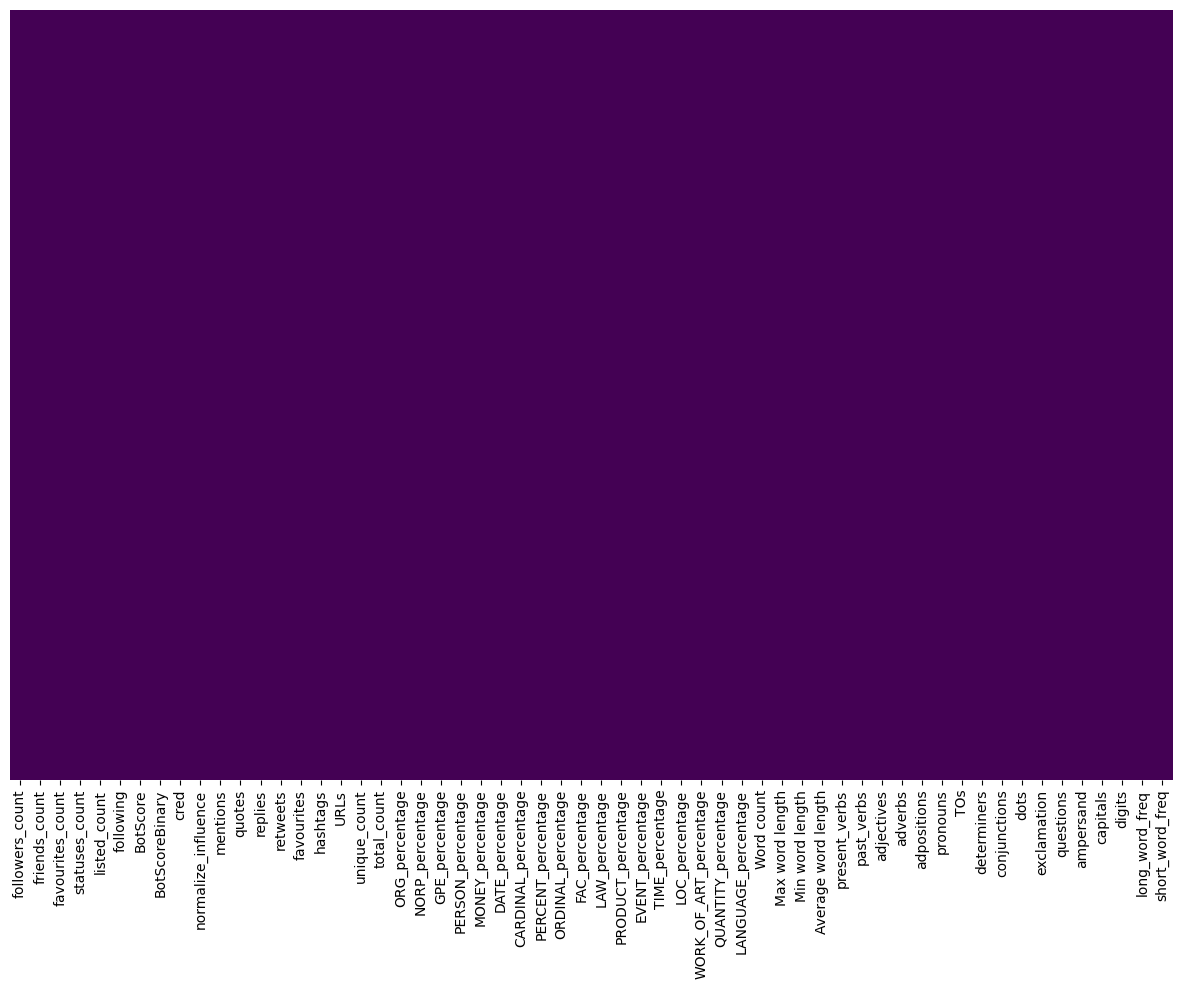

In [13]:
plt.figure(2, figsize = [15,10])
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

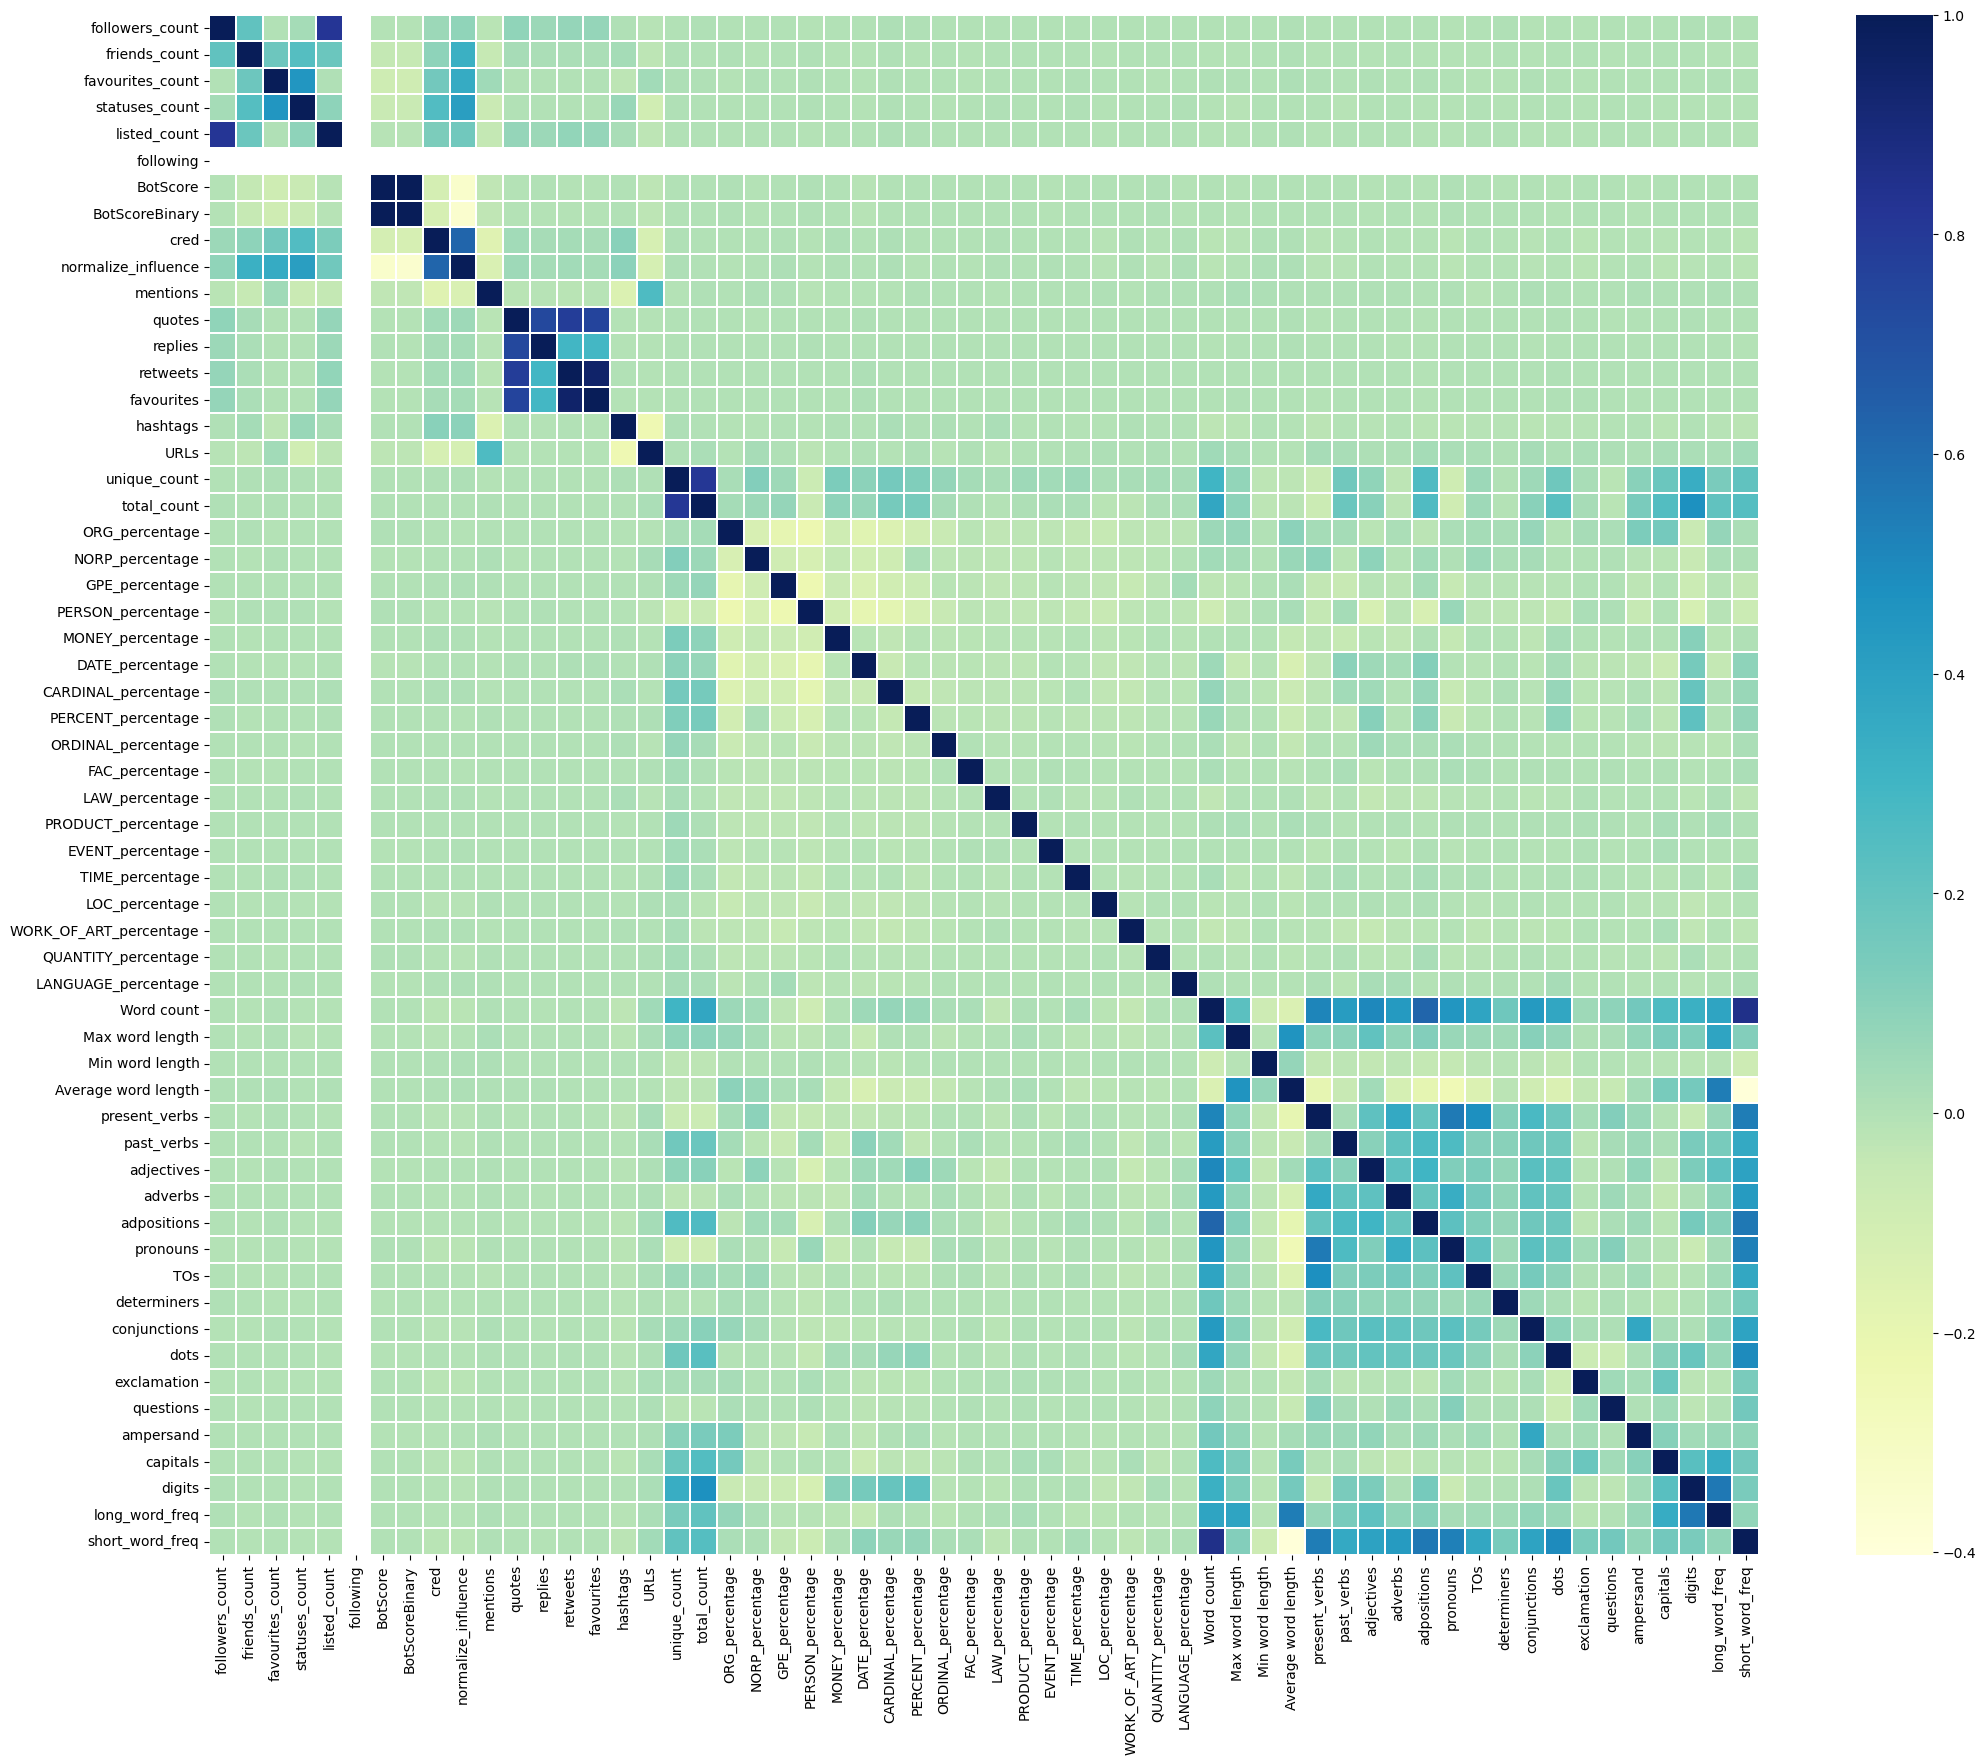

In [14]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize =(25, 20))
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [15]:
X = df.values
df.shape

(134198, 58)

In [9]:
y = df.pop('BinaryNumTarget').values

## mutual_info_classif (I-gain)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
mnb = GaussianNB()

In [18]:
mi = dict()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=1/2)

In [23]:
i_scores = mutual_info_classif(X_train, y_train)

In [24]:
for i,j in zip(df.columns,i_scores):
    mi[i]=j

In [25]:
df1 = pd.DataFrame.from_dict(mi,orient='index',columns=['I-Gain'])
df1.sort_values(by=['I-Gain'],ascending=False,inplace=True)
df1.head(-5)

,I-Gain
normalize_influence,0.066497
statuses_count,0.058749
cred,0.055642
favourites_count,0.052809
followers_count,0.030740
friends_count,0.024490
listed_count,0.019239
URLs,0.016171
hashtags,0.008778
PERSON_percentage,0.008303


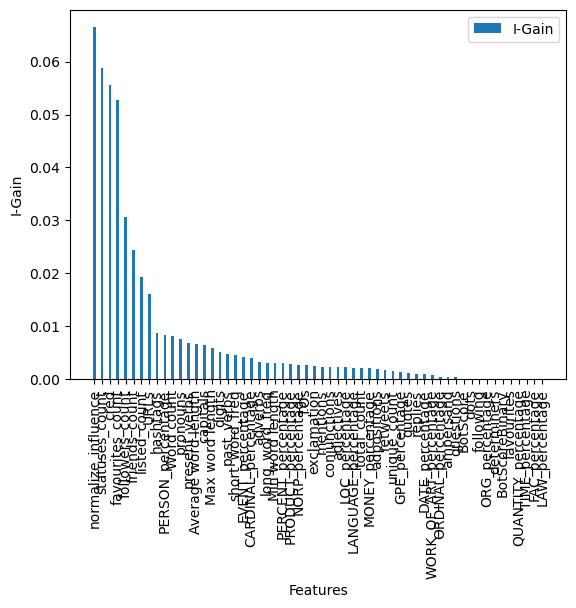

In [37]:
n = len(df.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax.bar(df1.index, df1["I-Gain"], label='I-Gain',width=.35)
ax.set_xticks(list(df1.index))
ax.set_xticklabels(list(df1.index), rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax.legend()

plt.show()

In [27]:
acc_scores = []
for kk in range(1, X.shape[1]+1):
    FS_trans = SelectKBest(mutual_info_classif, 
                           k=kk).fit(X_train, y_train)
    X_tR_new = FS_trans.transform(X_train)
    X_tS_new = FS_trans.transform(X_test)
    seg_NB = mnb.fit(X_tR_new, y_train)
    y_dash = seg_NB.predict(X_tS_new)
    acc = accuracy_score(y_test, y_dash)
    acc_scores.append(acc)

In [28]:
df1['Accuracy'] = acc_scores
df1.head(10)

,I-Gain,Accuracy
normalize_influence,0.066497,0.553108
statuses_count,0.058749,0.526491
cred,0.055642,0.542467
favourites_count,0.052809,0.538607
followers_count,0.030740,0.502467
friends_count,0.024490,0.503018
listed_count,0.019239,0.500902
URLs,0.016171,0.502675
hashtags,0.008778,0.503227
PERSON_percentage,0.008303,0.519158


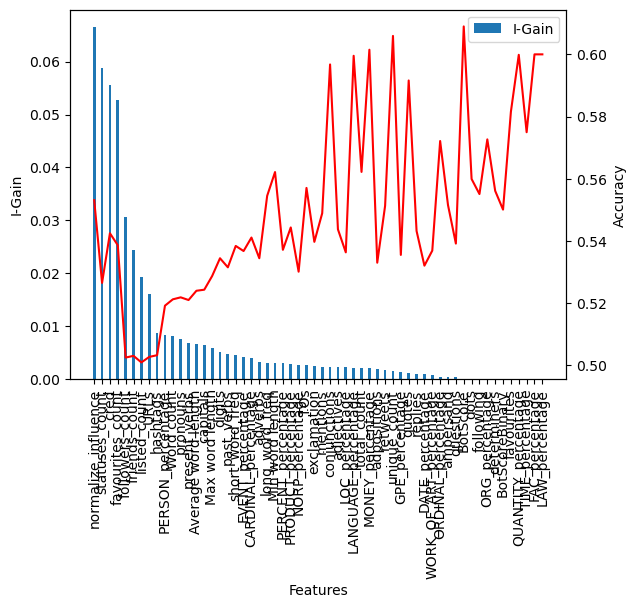

In [40]:
n = len(df1.index)
rr = range(1,n)
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df1.index, df1["I-Gain"], label='I-Gain',width=.35)
ax2.plot(df1.index, df1["Accuracy"], color='red', label='Accuracy')
ax.set_xticks(list(df1.index))
ax.set_xticklabels(list(df1.index), rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Accuracy')
ax.legend()

plt.show()

## ExtraTreesRegressor

In [19]:
#handling overfitting and improve accuracy
model=ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [20]:
print(model.feature_importances_)

[0.01647373 0.02042339 0.0247238  0.02254059 0.02629638 0.
 0.00607226 0.00240251 0.02859999 0.02699691 0.02364137 0.0049769
 0.01697711 0.00947245 0.01787272 0.01299876 0.01925845 0.01796119
 0.020155   0.020388   0.0153871  0.01847446 0.02839409 0.01189462
 0.01870256 0.01669366 0.01198076 0.00685383 0.00270869 0.0040276
 0.0046829  0.00254933 0.00509717 0.00639428 0.00582105 0.00303513
 0.00111255 0.02952519 0.02631066 0.01746361 0.02779114 0.02671957
 0.03104564 0.02938502 0.02434943 0.02861706 0.02652975 0.02226494
 0.0125941  0.02295273 0.02554748 0.01515049 0.01740565 0.01056721
 0.02972321 0.02552981 0.022865   0.025621  ]


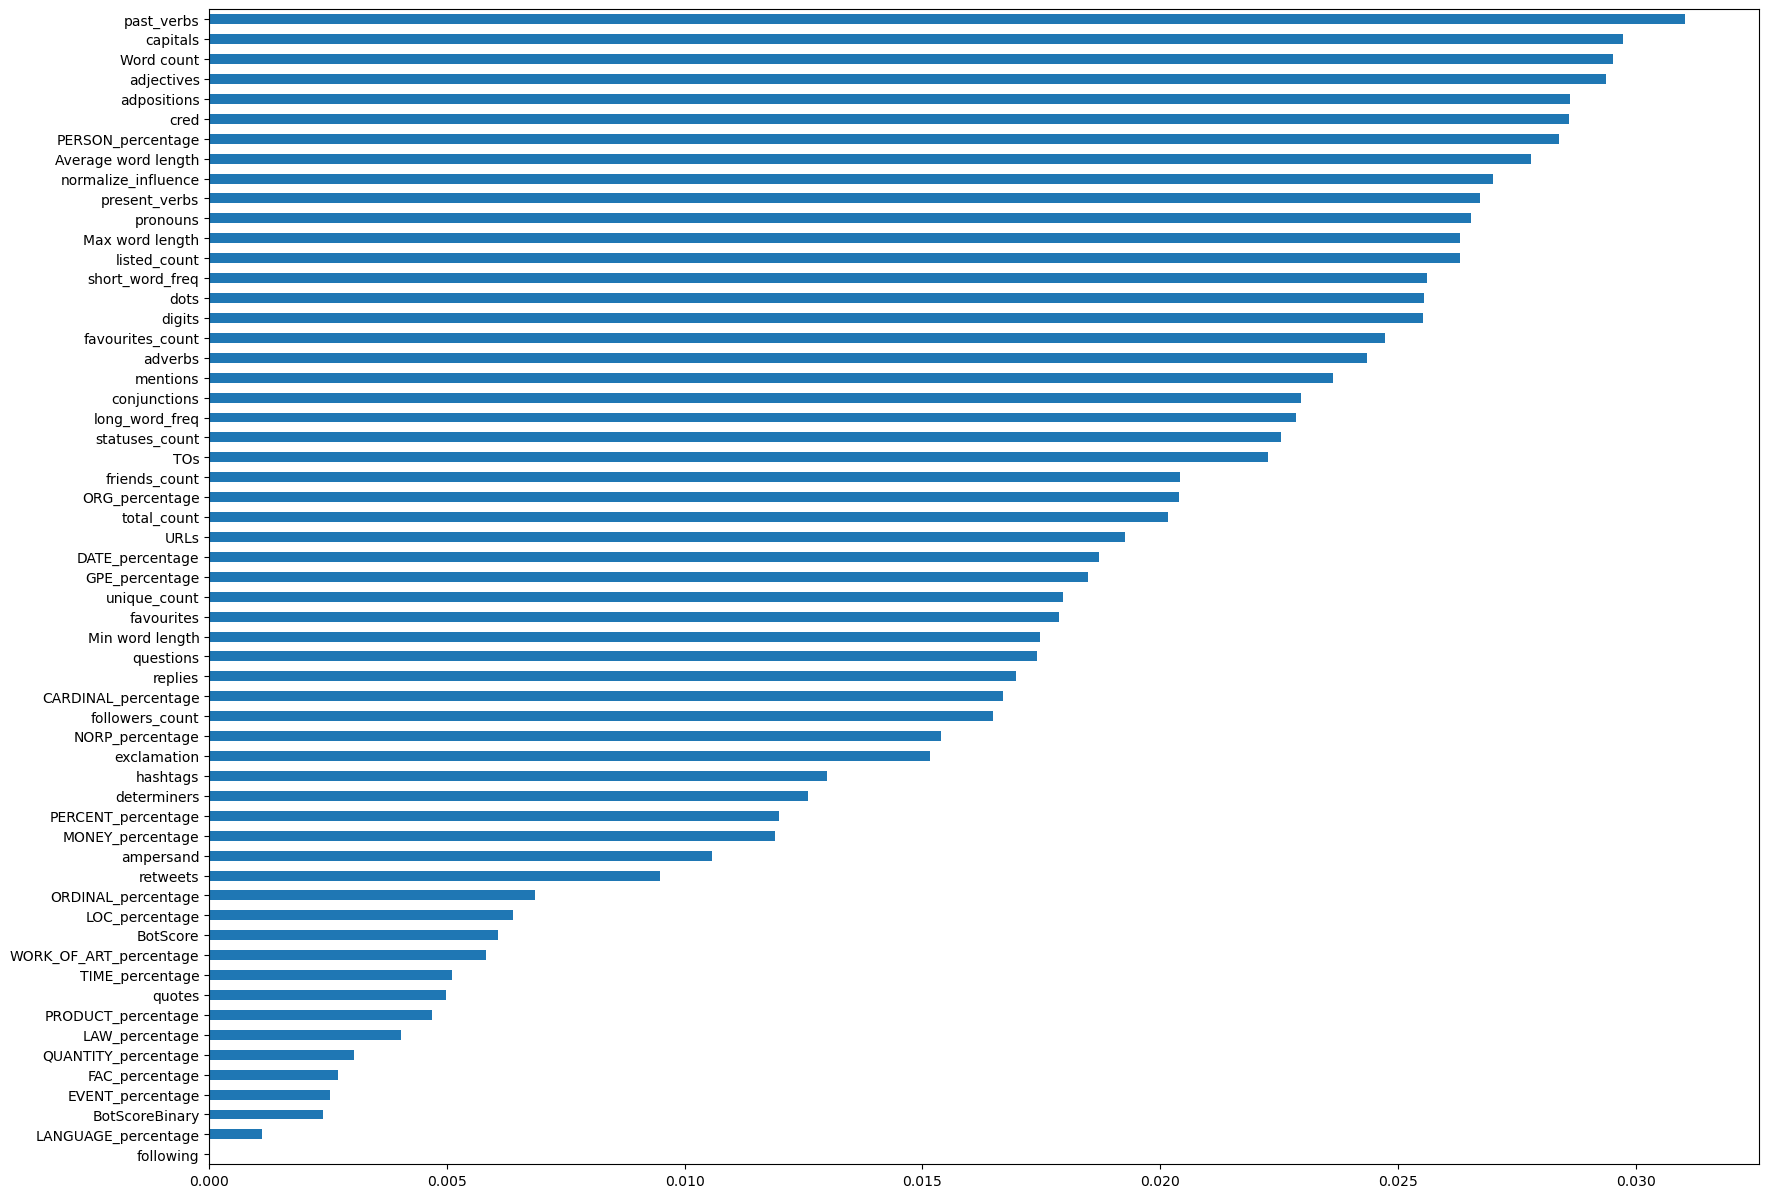

In [21]:
plt.figure(2, figsize = [20,15])
feat_importances = pd.Series(model.feature_importances_, index=df.columns).sort_values()
feat_importances.plot(kind='barh')
feat_importances.plot(kind='barh')
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [14]:
import eli5
from eli5.sklearn import PermutationImportance

In [15]:
y = df['BinaryNumTarget']

In [16]:
df.pop('BinaryNumTarget')

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
134193    0.0
134194    0.0
134195    0.0
134196    0.0
134197    0.0
Name: BinaryNumTarget, Length: 134198, dtype: float64

In [19]:
X = df

In [22]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [30]:
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X.values,train_y.values)

In [31]:
perm = PermutationImportance(my_model, random_state=1).fit(val_X.values, val_y.values)

In [32]:
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0243 ± 0.0024,PERSON_percentage
0.0183 ± 0.0024,listed_count
0.0151 ± 0.0018,URLs
0.0138 ± 0.0017,Word count
0.0118 ± 0.0024,past_verbs
0.0098 ± 0.0020,capitals
0.0096 ± 0.0019,CARDINAL_percentage
0.0077 ± 0.0033,adjectives
0.0076 ± 0.0007,Average word length
0.0075 ± 0.0021,favourites_count


In [36]:
html_table = eli5.show_weights(perm, feature_names = val_X.columns.tolist(), top=58)

In [38]:
html_table

Weight,Feature
0.0243 ± 0.0024,PERSON_percentage
0.0183 ± 0.0024,listed_count
0.0151 ± 0.0018,URLs
0.0138 ± 0.0017,Word count
0.0118 ± 0.0024,past_verbs
0.0098 ± 0.0020,capitals
0.0096 ± 0.0019,CARDINAL_percentage
0.0077 ± 0.0033,adjectives
0.0076 ± 0.0007,Average word length
0.0075 ± 0.0021,favourites_count


In [33]:
my_model1 = RandomForestRegressor(n_estimators=100,
                                  random_state=0).fit(train_X.values,train_y.values)

In [34]:
perm1 = PermutationImportance(my_model1, random_state=1).fit(val_X.values, val_y.values)

In [35]:
eli5.show_weights(perm1, feature_names = val_X.columns.tolist())

Weight,Feature
0.0638 ± 0.0023,PERSON_percentage
0.0444 ± 0.0022,listed_count
0.0415 ± 0.0020,Word count
0.0285 ± 0.0035,URLs
0.0248 ± 0.0008,Average word length
0.0238 ± 0.0017,capitals
0.0222 ± 0.0011,unique_count
0.0191 ± 0.0015,past_verbs
0.0175 ± 0.0006,digits
0.0172 ± 0.0017,pronouns


In [40]:
html_table1 = eli5.show_weights(perm1, feature_names = val_X.columns.tolist(), top=58)

In [41]:
html_table1

Weight,Feature
0.0638 ± 0.0023,PERSON_percentage
0.0444 ± 0.0022,listed_count
0.0415 ± 0.0020,Word count
0.0285 ± 0.0035,URLs
0.0248 ± 0.0008,Average word length
0.0238 ± 0.0017,capitals
0.0222 ± 0.0011,unique_count
0.0191 ± 0.0015,past_verbs
0.0175 ± 0.0006,digits
0.0172 ± 0.0017,pronouns
